# Few Simple Methods for Finding Roots

-Vikram Khaire; Date: August 30, 2021 

#### Finding roots is just solving $f(x) = 0$ 

Numerically it is to find out when $f(x)$ approximately crosses zero. The inputs you need is a finite intervel $[a, b]$ in which you can find the solution. 

-------------

### Example:  Find roots of polynomial $f(x) =  5x^2 + 2x -25$

#### Normal Algebra: 

$f(x)= 0$

$Ax^2+Bx +c = 0$

Solution is $\frac{- B \pm \sqrt{B^2 - 4 AC}}{2A} $

In [1]:
# basic imports 
#%matplotlib inline
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

In [2]:
def solve_quadratic(a, b, c):
    # olny for real roots
    square_root_term  = np.sqrt(b**2 - 4*a*c)
    first_solution  = (-b + square_root_term)/(2*a)
    second_solution = (-b - square_root_term)/(2*a)
    return first_solution, second_solution

In [3]:
solve_quadratic(a= 5, b= 2, c= -25)

(2.0449944320643647, -2.444994432064365)

####  Let's plot above function 

In [4]:
def function(x):
    return 5*x**2+ 2*x -25

<IPython.core.display.Javascript object>


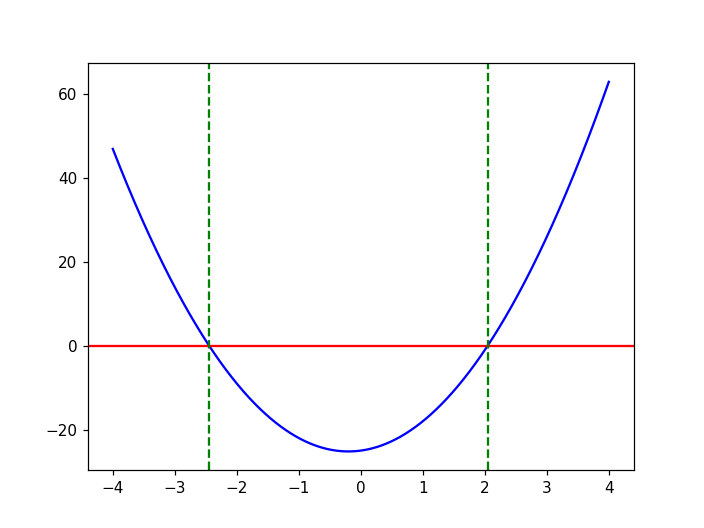

In [5]:
# simple plotting
x = np.linspace(-4, 4, 1000)
plt.plot(x, function(x), color= 'blue')
plt.axhline(y =0, color = 'r')
plt.axvline(x= -2.4445, ls = '--', c = 'g')
plt.axvline(x= 2.045, linestyle = '--', color = 'g')


In [7]:
function(np.array([solve_quadratic(5, 2, -25)[0], solve_quadratic(5, 2, -25)[1]]))

array([-7.10542736e-15,  0.00000000e+00])

## Bisection method

* Step 1:  Specify or guess interval $[a, b]$ in which only one solution exists i.e such that $f(a)$ and $f(b)$ has opposite signs

<IPython.core.display.Javascript object>


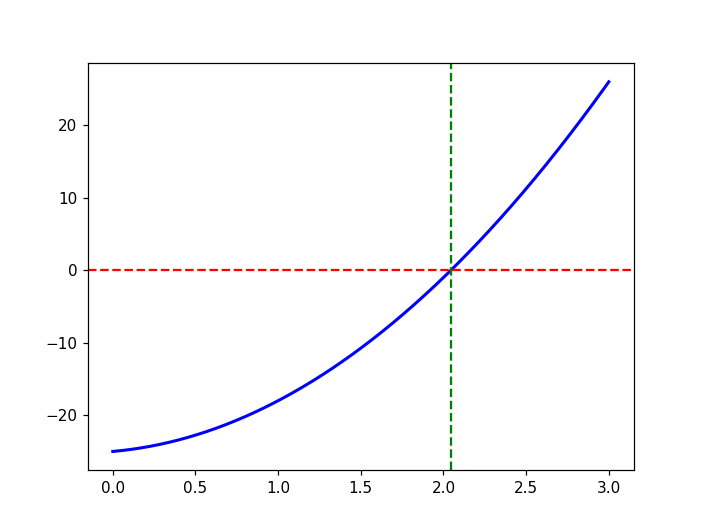

In [8]:
# [a, b] == [0, 3]
a=0; b=3 
x = np.linspace(0, 3, 1000)
plt.figure()
plt.plot(x, function(x), lw =2., c= 'b')
plt.axhline(0, color = 'r', ls = '--')
#plt.axvline(-2.4445, ls = '--', c = 'g')
plt.axvline(2.045, linestyle = '--', color = 'g')

* Step 2: find midpoing $c = \frac{a + b}{2}$ and $f(c)$

In [9]:
c = (a+b)/2
print(c)
function(c)

1.5


-10.75

* Step 3: Depending on sign of the $f(c)$ find next interval for search

     1) First check if (we are lucky!) $f(c) = 0$.
     
     2) If not then check the sign of $f(c)$ and compare it with sign of $f(a)$ and $f(b)$ to determine
     which two have opposite signs. The solution lies somewhere in that interval. 
     
     3) Depending on result of above step replace $a$ or $b$ by the value of c and repeate the Steps 2 and 3
     till you find solution (within your specified tolerance/error i.e $\Delta = |f(a) - f(b)|$). 
                

In [10]:
def bisection_root(a, b, error = 0.001):
    
    # check if intervals are right
    if function(a)*function(b) >=0 :
        print('Check the initial interval; solution may not exists')
        return
    
    c = a # randomly assigning in case while loop breaks
     
    # stopping while loop when we reach error
    while (abs(function(a)-function(b))) >= error:
        
        # finding midpoint
        c = (a+b)/2
        
        # check if we have a solution!
        if function(c)==0:
            break
        
        # check the signs 
        if function(c)*function(a) < 0:
            b=c
        else:
            a=c
            
        print(a, b, c, function(c))
                    
    print('Solution is ', c)
        
    return c
    

In [11]:
bisection_root(4, 3, error= 0.1)

Check the initial interval; solution may not exists


### A very simple animation of the bisection code 

Note: Animations will not be asked to reproduce in exams. These are just for fun illustration. (Also, I have just started exploring animation couple of hours ago. 😄 )

In [12]:
def bisection_array(a, b, iter_max =20):
    
    # storing arrays for plotting/table
    
    arr_c = [0]
    arr_a = [a]
    arr_b = [b]
    arr_iter = [0]
    arr_func = [0] # f(c)
    
    
    i = 0
    while i < iter_max:
        
        c = (a+b)/2
        i = i + 1 # changing iteration number
        
        if function(c)==0:
            break
        
        if function(c)*function(a) < 0:
            b=c
        else:
            a=c
            
        arr_c.append(c)
        arr_a.append(a)
        arr_b.append(b)
        arr_iter.append(i)
        arr_func.append(function(c))

        
    return arr_c, arr_func, arr_iter, arr_a, arr_b

In [13]:
arr_c, arr_func, arr_iter, arr_a, arr_b = bisection_array(0, 3)

<IPython.core.display.Javascript object>


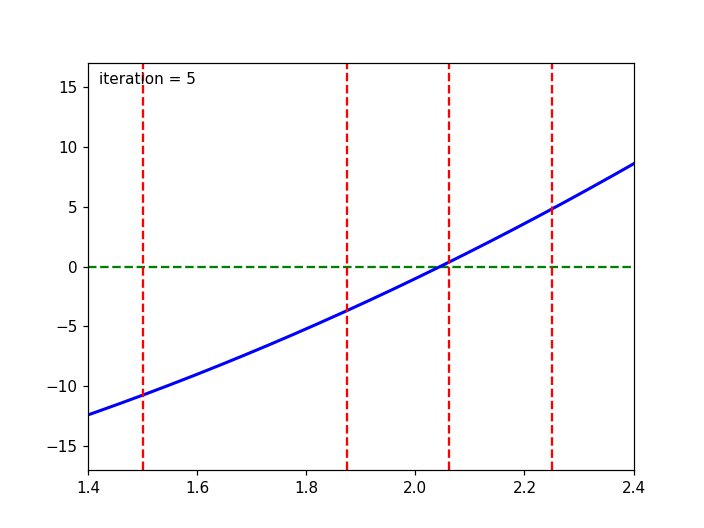

In [15]:
# from https://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/

# import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(1.4, 2.4), ylim=(-17, 17))
x = np.linspace(0, 5, 1000)
y = function(x)
ax.axhline(0, ls ='--', c ='g')
ax.plot(x, y, c = 'b', lw =2)
line, = ax.plot([], [], lw=2)
iter_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)


# initialization function: plot the background of each frame
def init():
    iter_text.set_text('')
    return line

# animation function. This is called sequentially
def animate(i):
    plt.axvline(arr_c[i], color = 'r', ls = '--')
    iter_text.set_text('iteration = {}'.format(i +1) )

    if i >8:
        ax = plt.axes(xlim=(2.0445, 2.046), ylim=(-0.015, 0.02))
        x = np.linspace(0, 5, 1000)
        y = function(x)
        ax.axhline(0, ls ='--', c ='g')
        ax.plot(x, y, c = 'b', lw =2)
        
    return line

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func= init, frames=20, interval=800)#, blit=True)

### accuracy of bisection with each iteration 

* solution lies in interval $|c_n - c| \le \frac{|b-a|}{2^n}$. Converges lineraly to the solution.

In [16]:
# showing in nice table format
import astropy.table as tab
tab.Table((arr_iter, arr_a, arr_b, arr_c, arr_func), names= ('iteration', 'a', 'b', 'c', 'f(c)'))


iteration,a,b,c,f(c)
int64,float64,float64,float64,float64
0,0.0,3.0,0.0,0.0
1,1.5,3.0,1.5,-10.75
2,1.5,2.25,2.25,4.8125
3,1.875,2.25,1.875,-3.671875
4,1.875,2.0625,2.0625,0.39453125
5,1.96875,2.0625,1.96875,-1.6826171875
6,2.015625,2.0625,2.015625,-0.655029296875
7,2.0390625,2.0625,2.0390625,-0.13299560546875
8,2.0390625,2.05078125,2.05078125,0.1300811767578125


## False position method

Same as bisection method to solve $f(x) = 0$ in intervale $[a, b]$ but instead of choosing midpoint as next point of iteration you choose a point that is at $g(x) = 0 $ where $g(x)$ is a line joining $(a, f(a))$ and $(b, f(b))$

<IPython.core.display.Javascript object>


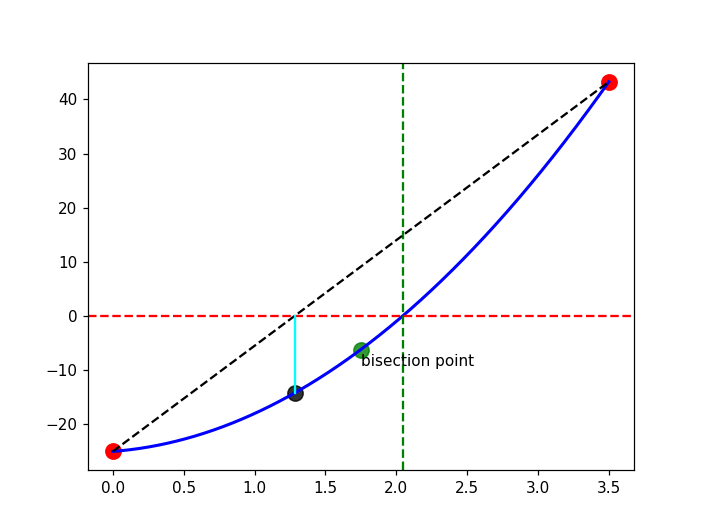

In [17]:
# let me explain with a diagram
# plotting same segment as above for function 5*x**2+ 2*x -25
a=0; b=3.5
x = np.linspace(a, b, 1000)
plt.figure()
plt.plot(x, function(x), lw =2., c= 'b')
plt.axhline(0, color = 'r', ls = '--')
#plt.axvline(-2.4445, ls = '--', c = 'g')
plt.axvline(2.045, linestyle = '--', color = 'g')

In [18]:
# say our interval is [0, 3.5]
# in bisection we choose midpoint c= 3.5/2

# let me highlight point a and b
plt.scatter([a, b], [function(a), function(b)], color = 'r', s =100)
c = (a+b)/2
plt.scatter([c], [function(c)], color= 'green', s = 100, alpha =0.8)
plt.text(c, function(c)-3, 'bisection point') # adding text


# for False position method
plt.plot([a, b], [function(a), function(b)], color = 'k', ls = '--')


intercept = 1.287
plt.plot ([intercept, intercept], [function(intercept), 0], c = 'cyan')
plt.scatter([intercept], [function(intercept)], color= 'k', s = 100, alpha =0.8)




In [19]:
function(intercept)

-14.144155000000001

### How to find intercept?

Equation of line $y = mx + x_0$. We want to solve for x when y = 0  

for line jointing two points $(a, f(a))$ and $(b, f(b))$

slope $m  = \frac{f(b) -f(a)}{b-a}$



find $x_0$? 

e.g use point $(b, f(b)$ i.e when $x= b, y =f (b)$

$f(b) = m b + x_0$            

i.e

$x_0 = f(b) -mb$


substitute it in $y= mx + x_0$

$y = mx -mb + f(b)$

we want to find $x=c$ when $y = 0$

$mc = mb -f(b)$

$c = b -f(b)/m$ 

$c = b - \frac{f(b) (b - a)}{f(b)- f(a)}$

$c= \frac{bf(b)- bf(a) -bf(b) + af(b)}{f(b)- f(a)}$

$c= \frac{af(b) - bf(a)}{f(b)-f(a)}$

### code for false position method

In [20]:
# rewriting function again (just for completenes)
def function(x):
    return 5*x**2+ 2*x -25

# false position method
def false_position(a, b, error = 0.001):
    
    # check if intervals are right
    if function(a)*function(b) >=0 :
        print('Check the initial interval; solution doesn not exists')
        return
    
    # initial false position point
    c = (a*function(b) - b*function(a))/(function(b) - function(a))   
    
    condition = True
    
     
    # stopping while loop when we reach error
    while condition:
        # note the error implementation is different here

        
        # finding false position point
        c = (a*function(b) - b*function(a))/(function(b) - function(a))
        
        # check if we have a solution!
        if function(c)==0:
            break
        
        # check the signs 
        if function(c)*function(a) < 0:
            b=c
        else:
            a=c
            
        condition = (abs(function(c)) >= error)
        
        print(a, b, c, function(c))

                    
    print('Solution is ', c)
        
    return c

In [21]:
bisection_root(0, 3, error = 0.0001)

1.5 3 1.5 -10.75
1.5 2.25 2.25 4.8125
1.875 2.25 1.875 -3.671875
1.875 2.0625 2.0625 0.39453125
1.96875 2.0625 1.96875 -1.6826171875
2.015625 2.0625 2.015625 -0.655029296875
2.0390625 2.0625 2.0390625 -0.13299560546875
2.0390625 2.05078125 2.05078125 0.1300811767578125
2.044921875 2.05078125 2.044921875 -0.001628875732421875
2.044921875 2.0478515625 2.0478515625 0.06418323516845703
2.044921875 2.04638671875 2.04638671875 0.03126645088195801
2.044921875 2.045654296875 2.045654296875 0.014816105365753174
2.044921875 2.0452880859375 2.0452880859375 0.006592944264411926
2.044921875 2.04510498046875 2.04510498046875 0.002481866627931595
2.044921875 2.045013427734375 2.045013427734375 0.00042645353823900223
2.0449676513671875 2.045013427734375 2.0449676513671875 -0.0006012215744704008
2.0449905395507812 2.045013427734375 2.0449905395507812 -8.73866374604404e-05
2.0449905395507812 2.045001983642578 2.045001983642578 0.00016953279555309564
2.0449905395507812 2.0449962615966797 2.04499626159667

2.0449934005737305

In [22]:
false_position(0, 3, error = 0.00001)

1.4705882352941178 3 1.4705882352941178 -11.245674740484427
1.9323671497584543 3 1.9323671497584543 -2.465051693155033
2.0248233375611524 3 2.0248233375611524 -0.4508055832162725
2.041443439458109 3 2.041443439458109 -0.0796565385510064
2.044371211819883 3 2.044371211819883 -0.013989317770754184
2.0448851120381626 3 2.0448851120381626 -0.002454168747028973
2.044975257879499 3 2.044975257879499 -0.00043045754438253425
2.0449910690640865 3 2.0449910690640865 -7.549911244808527e-05
2.044993842222444 3 2.044993842222444 -1.3241916537509724e-05
2.0449943286111134 3 2.0449943286111134 -2.322519677022683e-06
Solution is  2.0449943286111134


2.0449943286111134

### Newton-Raphson Method

Choose only one point as an intial guess $x_1$ and draw a tangent at point $f(x_1)$.

Find the intercept of that tangent to line $y = 0$. That is your new $x_1$ and repeat. 

From wikipedia: 
<img src="NewtonIteration_Ani.gif">

In [74]:
def function(x):
    f = (1/(x-1)**2) + (1/(x+1)**2) -3
    return f
    

<IPython.core.display.Javascript object>


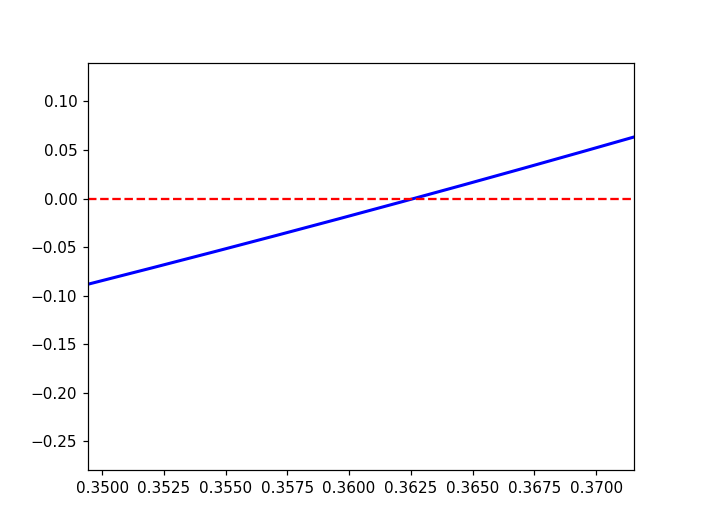

In [75]:
a=-0.9; b=0.9
x = np.linspace(a, b, 100000)
plt.figure()
plt.plot(x, function(x), lw =2., c= 'b')
plt.axhline(0, color = 'r', ls = '--')
#plt.axvline(-2.4445, ls = '--', c = 'g')
#plt.axvline(2.045, linestyle = '--', color = 'g')

In [76]:
function(0)

-1.0

In [79]:
bisection_root(0.1, 0.4)

0.25 0.4 0.25 -0.5822222222222222
0.325 0.4 0.325 -0.2356148984183215
0.36250000000000004 0.4 0.36250000000000004 -0.0007327243401586969
0.36250000000000004 0.38125000000000003 0.38125000000000003 0.136128161736925
0.36250000000000004 0.37187500000000007 0.37187500000000007 0.06592877621894422
0.36250000000000004 0.36718750000000006 0.36718750000000006 0.03216806298193742
0.36250000000000004 0.36484375 0.36484375 0.015611661715399627
0.36250000000000004 0.36367187500000003 0.36367187500000003 0.007413149097609928
0.36250000000000004 0.36308593750000007 0.36308593750000007 0.0033336550807590015
0.36250000000000004 0.36279296875000006 0.36279296875000006 0.001298828859010115
0.36250000000000004 0.362646484375 0.362646484375 0.0002826434825227153
0.36257324218750003 0.362646484375 0.36257324218750003 -0.00022514257922390257
Solution is  0.36257324218750003


0.36257324218750003